In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Loading & Exploration**

Load the dataset using Pandas.


In [3]:
wine_data = pd.read_csv("/content/drive/My Drive/winequality-red.csv", sep=";")
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
wine_data.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
redwine_data = wine_data.rename(
    columns={
        'fixed acidity':'fixed_acidity',
        'volatile acidity':'volatile_acidity',
        'citric acid':'citric_acid',
        'residual sugar':'residual_sugar',
        'free sulfur dioxide':'free_sulfur_dioxide',
        'total sulfur dioxide':'total_sulfur_dioxide'
    }
)

redwine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
redwine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
redwine_data.shape

(1599, 12)

**Check for missing values and report your findings.**

In [10]:
#check for missing values
print(redwine_data.isnull().sum())# As per the output displayed, there are no missing values in any column

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


**Drop columns with object/string data types if not useful.**

In [11]:
#Identifying columns with object/string data types
object_columns = redwine_data.select_dtypes(include=['string']).columns
print(object_columns) # there are no columns with object data type and hence nothing to drop

Index([], dtype='object')


**Handle missing data (you may use .fillna(), .dropna(), or any imputation strategy).**


In [12]:
#using the median strategy
columns_with_null = redwine_data.columns[redwine_data.isnull().any()].to_list()
if'quality' in columns_with_null:
  columns_with_null.remove('quality')

new_wine_data = redwine_data.copy()

if columns_with_null:
  imputer = SimpleImputer(strategy='median')
  new_wine_data[columns_with_null] = imputer.fit_transform(new_wine_data[columns_with_null])
  print('Missing values handled')
else:
  print('No missing values imputed')

  print('Missing values:')
  print(new_wine_data.isnull().sum())


No missing values imputed
Missing values:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


**Remove duplicates if any.**

In [13]:
print(redwine_data.duplicated().sum())#displays sum of rows with duplicates

240


In [14]:
newwine_data = redwine_data.drop_duplicates()#removing duplicates
newwine_data.shape

(1359, 12)

**Detect and remove outliers using IQR method and Z-score method.**

In [15]:
outliers = np.abs((newwine_data.drop('quality', axis=1) - newwine_data.drop('quality', axis=1).mean()) / new_wine_data.drop('quality', axis=1).std())
print("Outliers >3:")
display((outliers>3).sum()) #displays outliers in our data

Outliers >3:


,0
fixed_acidity,9
volatile_acidity,10
citric_acid,1
residual_sugar,24
chlorides,30
free_sulfur_dioxide,18
total_sulfur_dioxide,14
density,13
pH,8
sulphates,24


In [16]:
outlier_mask = (outliers > 3).any(axis=1)
cleaned_data = newwine_data[~outlier_mask]
print("Shape of data before:", newwine_data.shape)
print("\nShape of data after:", cleaned_data.shape)
print("\nRows removed:", len(newwine_data)-len(cleaned_data))

Shape of data before: (1359, 12)

Shape of data after: (1235, 12)

Rows removed: 124


**Create a new column sulfur_ratio = free_sulfur_dioxide / (total_sulfur_dioxide + 1e-6) and truncate it to 2 decimals.**

In [17]:
cleaned_data['sulfur_ratio'] = (cleaned_data['free_sulfur_dioxide'] / (cleaned_data['total_sulfur_dioxide'] +1e-6)).round(2)
cleaned_data.head()

<ipython-input-17-276b4c497f2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['sulfur_ratio'] = (cleaned_data['free_sulfur_dioxide'] / (cleaned_data['total_sulfur_dioxide'] +1e-6)).round(2)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,sulfur_ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.32
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.37
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.28
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.28
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0.32


**Feature Engineering**
**Apply MinMaxScaler and StandardScaler to numeric columns**


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cleaned_data.drop(['quality','sulfur_ratio'], axis=1))

#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(cleaned_data.drop(['quality','sulfur_ratio'], axis=1))



**Use pd.get_dummies() on categorical columns (if any)**

In [19]:
cleaned_data.head(10) # as per the data below, its all numerical data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,sulfur_ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.32
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.37
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.28
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.28
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0.32
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0.25
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,0.71
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,0.50
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0.17
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,0.23


Add a new categorical column based on quality: quality_category = "low" for quality ≤ 4
medium for 5–6, high for ≥ 7


In [20]:
cleaned_data['quality_category'] = pd.cut(cleaned_data['quality'], bins = [0, 4, 6, 7], labels = ['low', 'Medium', 'High'])
cleaned_data.head(10)

<ipython-input-20-c7988f7bdcb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['quality_category'] = pd.cut(cleaned_data['quality'], bins = [0, 4, 6, 7], labels = ['low', 'Medium', 'High'])


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,sulfur_ratio,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.32,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.37,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.28,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.28,Medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0.32,Medium
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0.25,Medium
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,0.71,High
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,0.50,High
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0.17,Medium
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,0.23,Medium


Reshaping & Aggregation
Group data by quality_category and compute the average of alcohol, pH, and sulphates.


In [21]:
avg_alcohol = cleaned_data.groupby("quality_category")["alcohol"].mean()
print(avg_alcohol)

quality_category
low       10.107407
Medium    10.252720
High      11.507849
Name: alcohol, dtype: float64


<ipython-input-21-4c85dc1b860d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_alcohol = cleaned_data.groupby("quality_category")["alcohol"].mean()


In [22]:
median_alcohol = cleaned_data.alcohol.median()
for i, alcohol in enumerate(cleaned_data.alcohol):
  if alcohol >=median_alcohol:
    cleaned_data.loc[i, 'alcohol'] = 'High'
  else:
    cleaned_data.loc[i, 'alcohol'] = 'low'

cleaned_data.groupby('alcohol').quality.mean()

<ipython-input-22-27932b84f769>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'low' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cleaned_data.loc[i, 'alcohol'] = 'low'
<ipython-input-22-27932b84f769>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.loc[i, 'alcohol'] = 'low'


,quality
alcohol,
8.5,5.000000
9.0,5.000000
9.05,4.000000
9.2,5.000000
9.233333,6.000000
9.25,6.000000
9.3,5.000000
9.4,5.166667
9.5,5.272727


In [23]:
median_pH = cleaned_data.pH.median()
for i, pH in enumerate(cleaned_data.pH):
  if pH >=median_pH:
    cleaned_data.loc[i, 'pH'] = 'High'
  else:
    cleaned_data.loc[i, 'pH'] = 'low'

cleaned_data.groupby('pH').quality.mean()

<ipython-input-23-6c48f2641ce5>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'High' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cleaned_data.loc[i, 'pH'] = 'High'


,quality
pH,
3.1,5.000000
3.17,7.000000
3.21,5.500000
3.24,8.000000
3.25,6.000000
3.26,6.000000
3.27,6.000000
3.29,6.000000
3.3,6.000000


In [24]:
mean_sulphates = cleaned_data.sulphates.mean()
for i, sulphates in enumerate(cleaned_data.sulphates):
  if sulphates >=mean_sulphates:
    cleaned_data.loc[i, 'sulphates'] = 'High'
  else:
    cleaned_data.loc[i, 'sulphates'] = 'low'

cleaned_data.groupby('sulphates').quality.mean()

<ipython-input-24-8d6d7d938117>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'low' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cleaned_data.loc[i, 'sulphates'] = 'low'


,quality
sulphates,
0.56,6.000000
0.58,5.000000
0.66,6.000000
0.71,5.000000
0.75,6.000000
0.76,6.000000
0.78,6.000000
0.82,6.000000
0.84,6.000000


**Use .pivot_table() to summarize alcohol against quality_category and sulphates.**

In [25]:
pivot_table = pd.pivot_table(cleaned_data,values="alcohol",index="quality_category",columns="sulphates",aggfunc="mean")
pivot_table

<ipython-input-25-8c8cf545e14f>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(cleaned_data,values="alcohol",index="quality_category",columns="sulphates",aggfunc="mean")


TypeError: agg function failed [how->mean,dtype->object]


Part 3: Data Visualization


Use Matplotlib and Seaborn for the following:
Heatmap for correlation (drop non-numeric columns first).
Boxplot of alcohol by quality_category.
Histogram of pH with bins=20.
PairGrid plot for: alcohol, volatile_acidity, sulphates, total_sulfur_dioxide (Hue quality_category)
Add scatter (upper), kdeplot (lower), histplot (diag), and line of best fit in scatter


In [28]:
numeric_df = cleaned_data.drop(columns=['quality_category','pH','sulphates','alcohol'])
numeric_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,quality,sulfur_ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,5.0,0.32
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,5.0,0.37
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,5.0,0.28
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,6.0,0.28
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,5.0,0.32


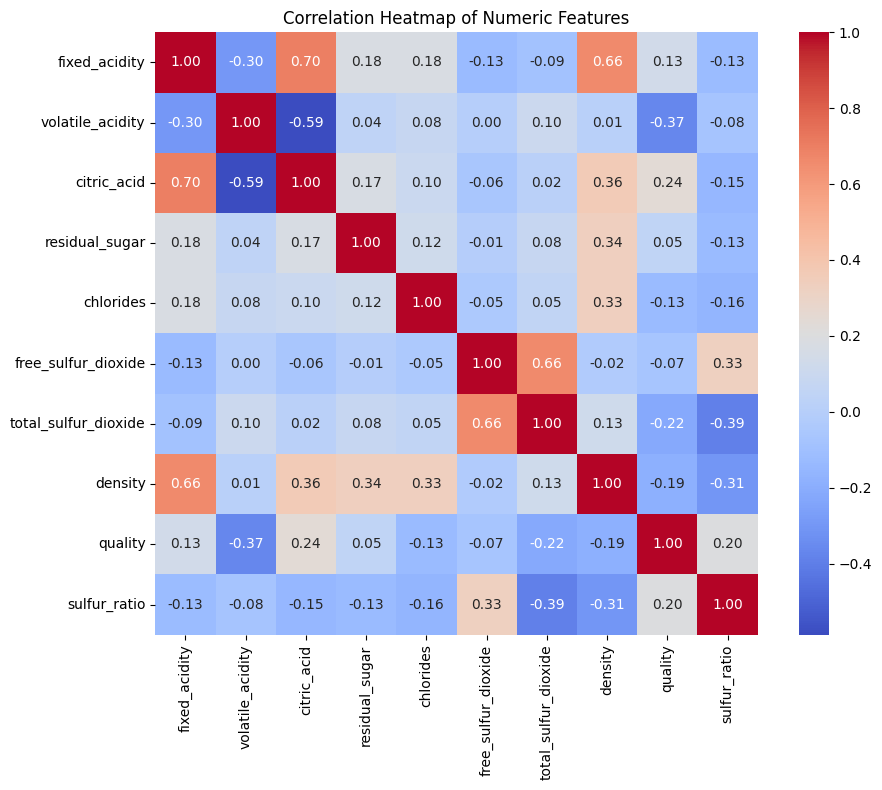

In [29]:
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f",square=True)

# Add a title and adjust layout
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

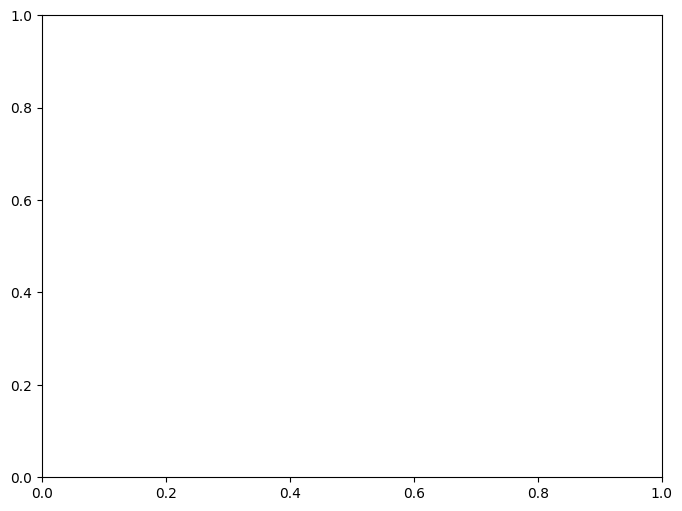

In [30]:
# Create a boxplot of alcohol content by quality category
plt.figure(figsize=(8, 6))
sns.boxplot(data=cleaned_data, x="quality_category", y="alcohol", palette="Set2")

# Add title and axis labels
plt.title("Boxplot of Alcohol Content by Quality Category")
plt.xlabel("Quality Category")
plt.ylabel("Alcohol")

# Adjust layout
plt.tight_layout()
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

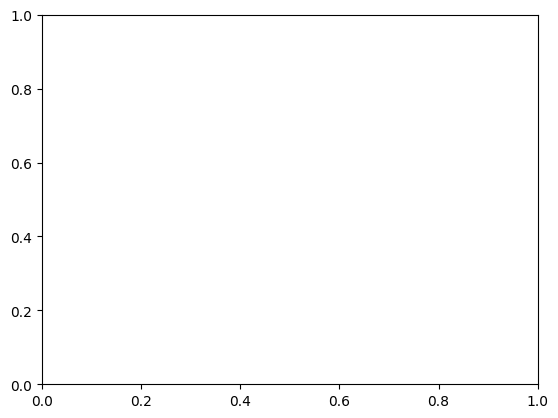

In [31]:
plt.hist(cleaned_data['pH'], bins=20, edgecolor='black') # bins=20 specifies the number of bins

# Add labels and title
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.title('Histogram of pH with bins=20')

# Show the plot
plt.show()

TypeError: PairGrid.__init__() got an unexpected keyword argument 'x'

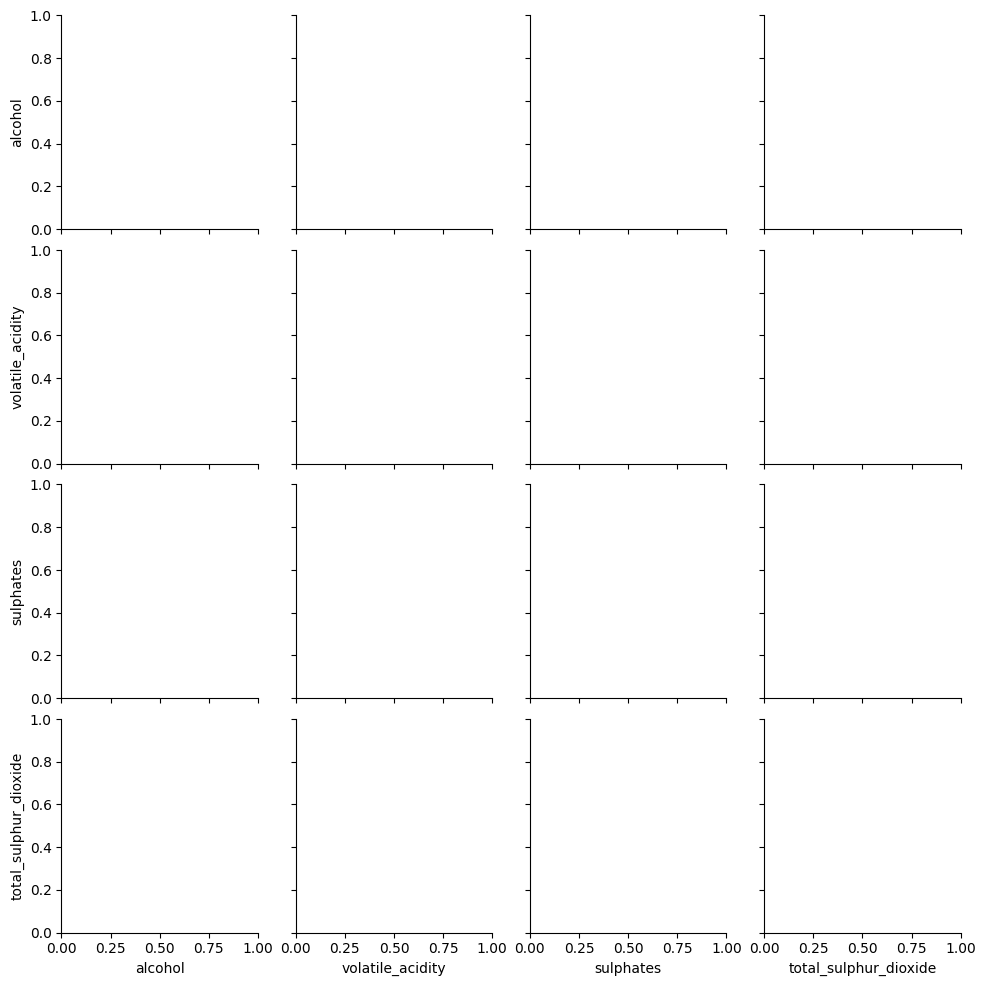

In [32]:
data = sns.PairGrid(
    cleaned_data,
    vars = ['alcohol', 'volatile_acidity', 'sulphates', 'total_sulphur_dioxide'],
    hue = 'quality_category',
    palette = 'viridis'
)

data.map_upper(sns.PairGrid)
data.map_lower(sns.kdeplot)
data.map_diag()

plt.suptitle("PairGrid of Selected Features Colored by Quality Category", y=1.02)
plt.tight_layout()
plt.show()


TypeError: 'value' must be an instance of str or bytes, not a float

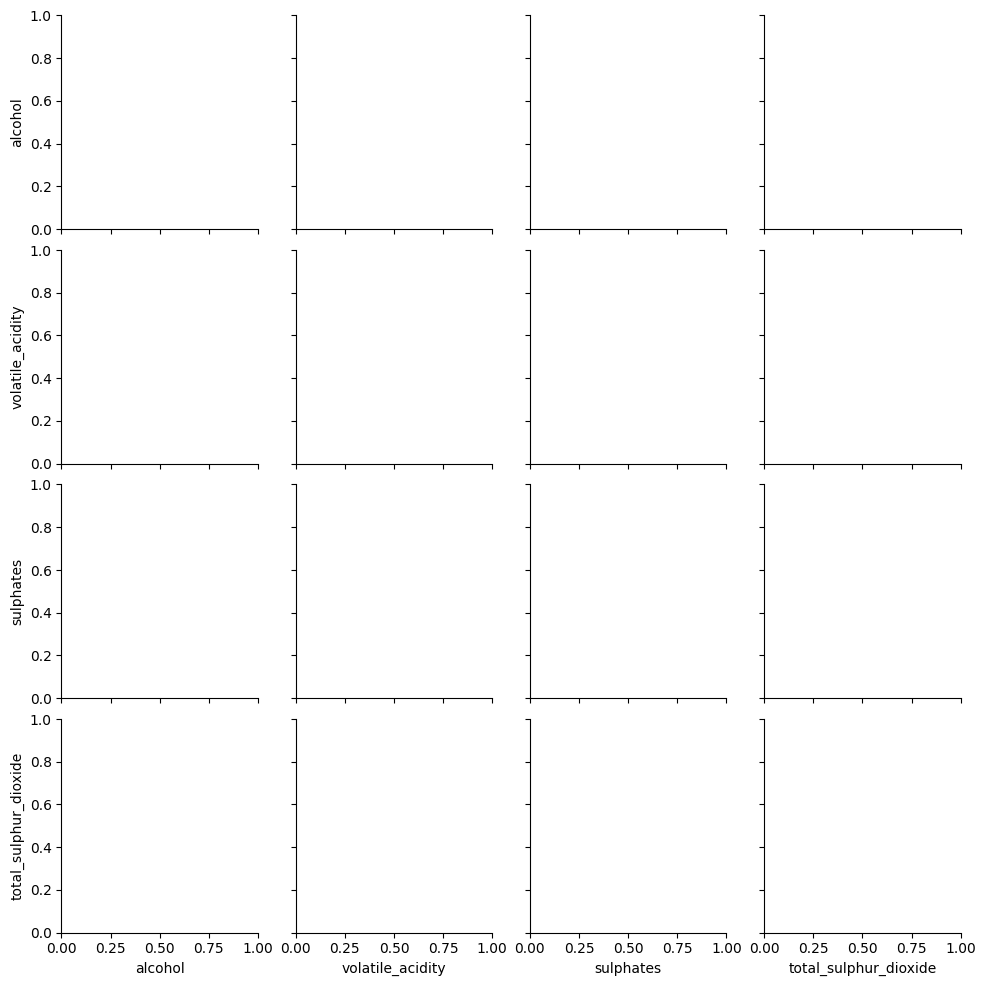

In [34]:
data = sns.PairGrid(
    cleaned_data,
    vars = ['alcohol', 'volatile_acidity', 'sulphates', 'total_sulphur_dioxide'],
    hue = 'quality_category',
    palette = 'viridis'
)

data.map_upper(sns.scatterplot)
data.map_lower(sns.kdeplot)
data.map_diag()

Part 4: Basic Statistical Analysis

4. Concepts Applied: Skewness and Kurtosis, Hypothesis Testing, Correlation Analysis, Linear Regression


Tasks:
Calculate skewness and kurtosis for scaled numeric columns.
Use a histogram and density plots to visualize skewed features before and after transformation.
Perform a t-test to compare alcohol content between high and low-quality wine.
Fit a simple linear regression (alcohol → quality) using NumPy and interpret the coefficients.


In [ ]:
cleaned_data.skew()